<a href="https://colab.research.google.com/github/rveerag567/Tensorflow/blob/master/ML_mobile_tflite_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://books.google.co.in/books/about/Machine_Learning_Projects_for_Mobile_App.html?id=L-l1DwAAQBAJ&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false
#Machine Learning Projects for Mobile Applications by Karthikeyan NG

In [5]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 99kB/s 
     |████████████████████████████████| 1.7MB 42.0MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=ddc2e9feda207bfaad674cf9213ba31893186b9021f3c323032c2e81707fc0df
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [2]:
tf.__version__

'1.4.0'

In [0]:
#Random number generator
randnumgen = numpy.random


In [0]:
# Parameters
learning_rate = 0.01
training_steps = 1000

values_X = numpy.asarray([1,2,3,4,5.5,6.75,7.2,8,3.5,4.65,5,1.5,4.32,1.65,6.08])
values_Y = numpy.asarray([50,60,65,78,89,104,111,122,71,85,79,56,81.8,55.5,98.3])
iterations = values_X.shape[0]


In [0]:
# tf float points - graph inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")


In [0]:
# Set the weight and bias
W = tf.Variable(randnumgen.randn(), name="weight")
b = tf.Variable(randnumgen.randn(), name="bias")


In [0]:
# Linear model construction
# y = xw + b
prediction = tf.add(tf.multiply(X, W), b)


In [0]:
# The cost method helps to minimize error for gradient descent. This is called mean sqauared error.
cost = tf.reduce_sum(tf.pow(prediction-Y, 2))/(2*iterations)


In [0]:
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Streaming output truncated to the last 5000 lines.
Step: 0667 cost= 14.722790718 W= 11.6951685 b= 28.454725
Step: 0667 cost= 14.722715378 W= 11.690056 b= 28.453884
Step: 0668 cost= 14.712539673 W= 11.696627 b= 28.460455
Step: 0668 cost= 14.708734512 W= 11.707488 b= 28.465885
Step: 0668 cost= 14.709133148 W= 11.710311 b= 28.466825
Step: 0668 cost= 14.712133408 W= 11.717489 b= 28.46862
Step: 0668 cost= 14.705588341 W= 11.703135 b= 28.466011
Step: 0668 cost= 14.703155518 W= 11.687554 b= 28.463703
Step: 0668 cost= 14.703981400 W= 11.679807 b= 28.462627
Step: 0668 cost= 14.703891754 W= 11.680334 b= 28.462694
Step: 0668 cost= 14.702250481 W= 11.684198 b= 28.463799
Step: 0668 cost= 14.701188087 W= 11.691033 b= 28.46527
Step: 0668 cost= 14.710825920 W= 11.664632 b= 28.45999
Step: 0668 cost= 14.695867538 W= 11.674675 b= 28.466684
Step: 0668 cost= 14.692687988 W= 11.683023 b= 28.468616
Step: 0668 cost= 14.685165405 W= 11.691553 b= 28.473785
Step: 0668 cost= 14.685091019 W= 11.686452 b= 28.472946

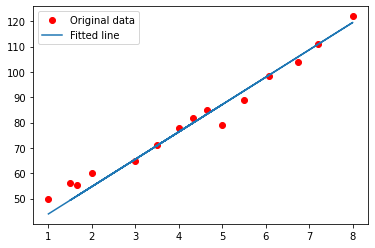

In [11]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for step in range(training_steps):
        for (x, y) in zip(values_X, values_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            c = sess.run(cost, feed_dict={X: values_X, Y:values_Y})
            print("Step:", '%04d' % (step+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Successfully completed!")
    training_cost = sess.run(cost, feed_dict={X: values_X, Y: values_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))

    # Graphic display
    plt.plot(values_X, values_Y, 'ro', label='Original data')
    plt.plot(values_X, sess.run(W) * values_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
